In [40]:
import numpy as np

from data import *

import soundfile as sf


from scipy.io import wavfile

import matplotlib.pyplot as plt


vocales = ["a.wav", "e.wav", "i.wav", "o.wav", "u.wav"]
consonantes = ["f.wav", "j.wav", "s.wav", "sh.wav"]
audios = []
recortados = []
colores1 = ["#03045E", "#0077B6", "#00B4D8", "#90E0EF", "#CAF0F8"]
colores2 = ["#BFB5AF", "#ECE2D0", "#D5B9B2", "#A26769", "#582C4D"]
colores3 = ["#CAA8F5", "#9984D4", "#592E83", "#230C33"]


frec = 14700
N = int(0.2 * frec)  # 200 ms

def guardar_señal(señal):
    audio, _ = sf.read(señal)
    audios.append(audio)
    audio_recortado = audio[:N]
    recortados.append(audio_recortado)


    
for vocal in vocales:
    guardar_señal(vocal)
for consonante in consonantes:
    guardar_señal(consonante)



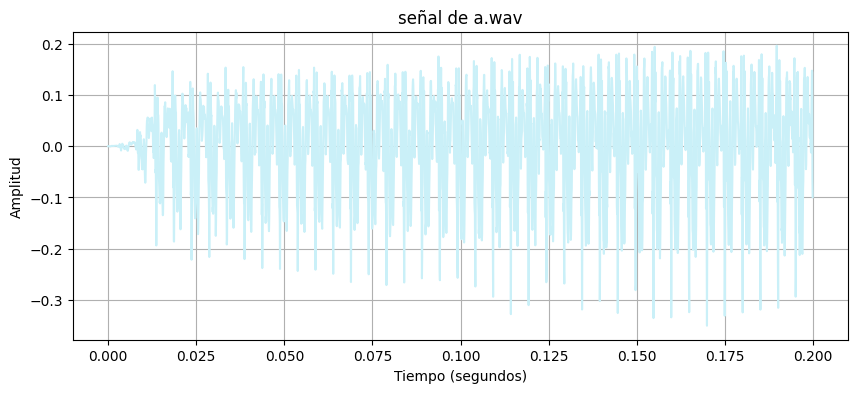

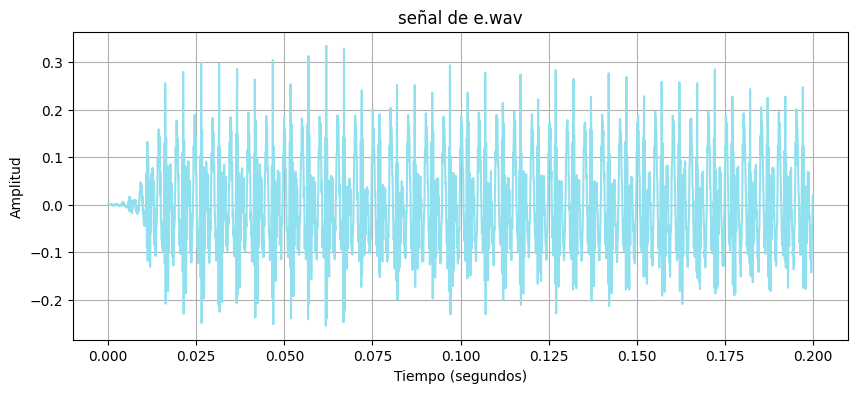

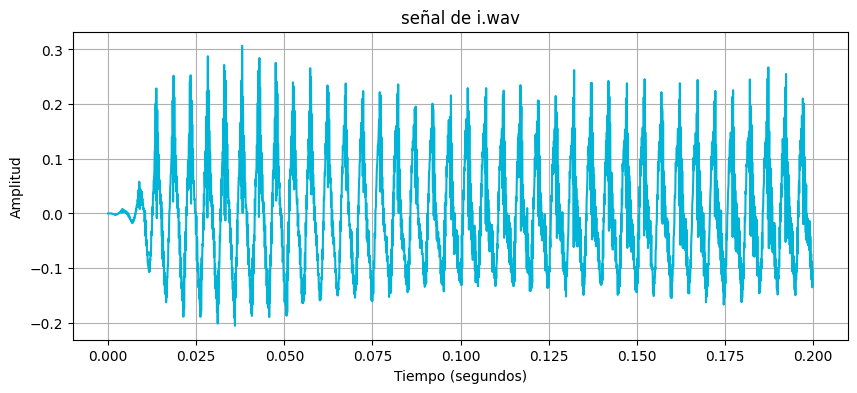

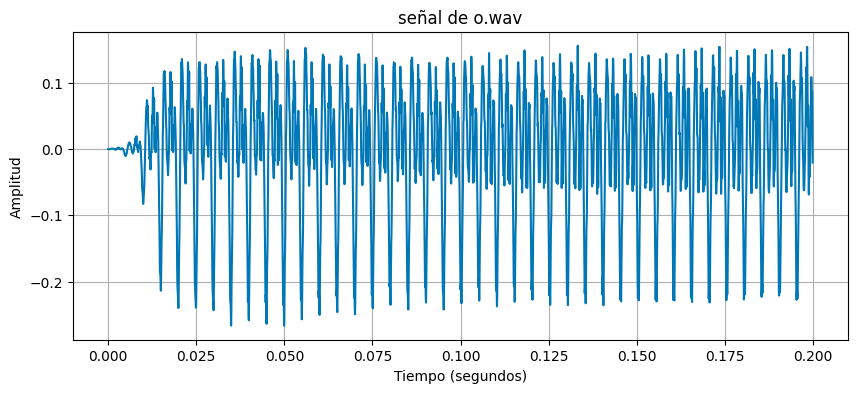

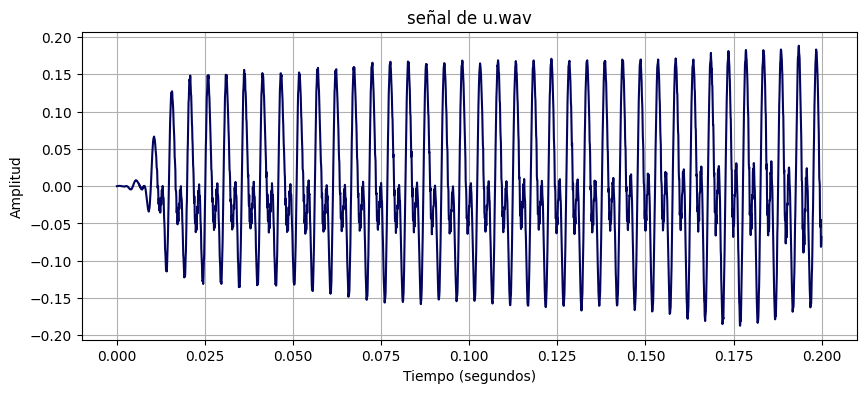

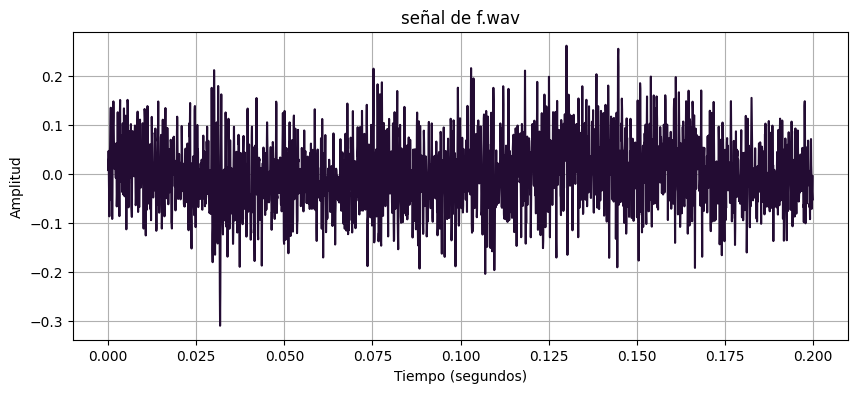

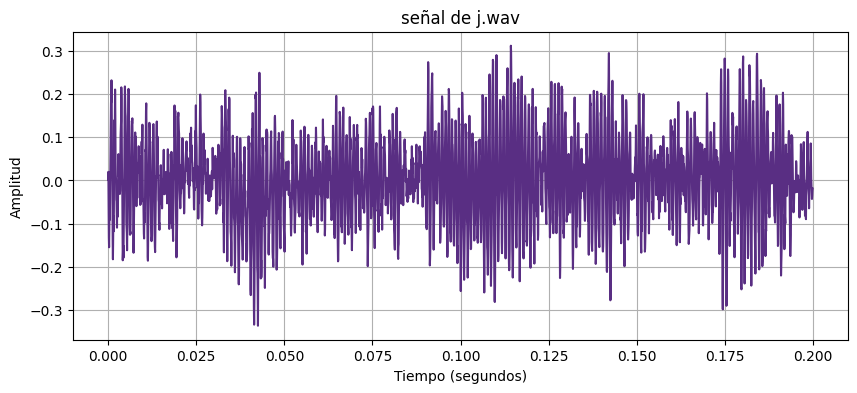

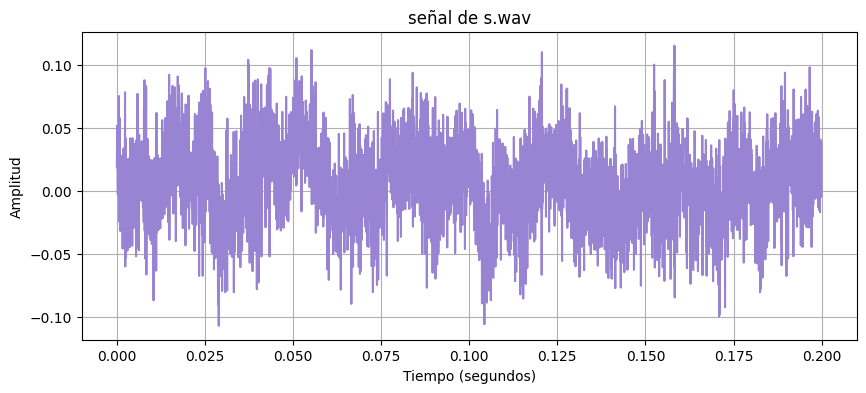

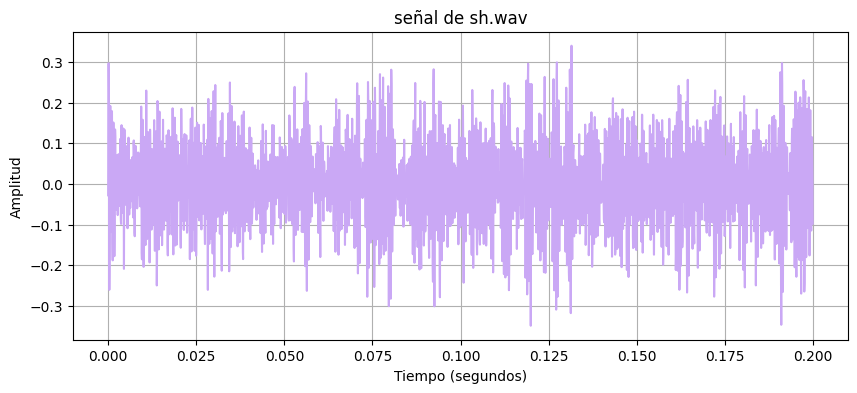

In [41]:
def graficar_señal(audio_recortado, color, nombre):
    tiempo = np.arange(0, N) / frec

    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, audio_recortado, color=color)
    plt.title(f"señal de {nombre}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

colores1 = colores1[::-1]
for i, vocal in enumerate(vocales):
    graficar_señal(recortados[i], colores1[i], vocal)

colores3 = colores3[::-1]
for i, consonante in enumerate(consonantes):
    graficar_señal(recortados[i + len(vocales)], colores3[i], consonante)


    
    

In [42]:
from scipy import signal
autocorrelaciones = []
lags_var = []

def calcular_autocorrelacion(audio_recortado):
    n = len(audio_recortado)

    autocorr = signal.correlate(audio_recortado, audio_recortado, mode='full')


    autocorrelaciones.append(autocorr)
    lags = np.arange(-len(audio_recortado)+1, len(audio_recortado))
    lags_var.append(lags)

for audio_recortado in recortados:
    calcular_autocorrelacion(audio_recortado)



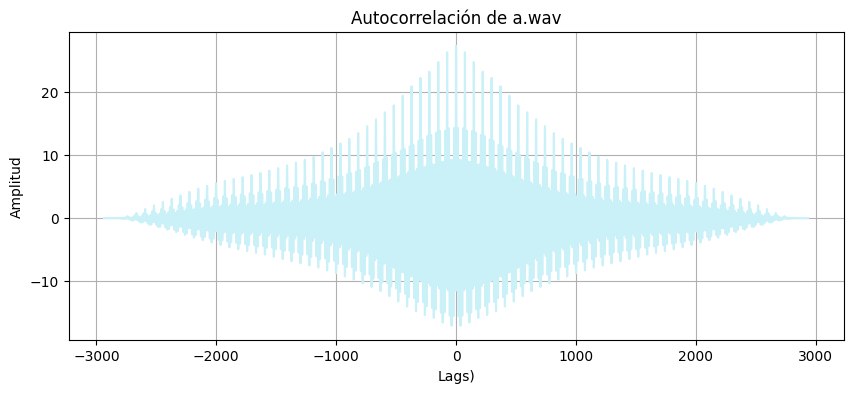

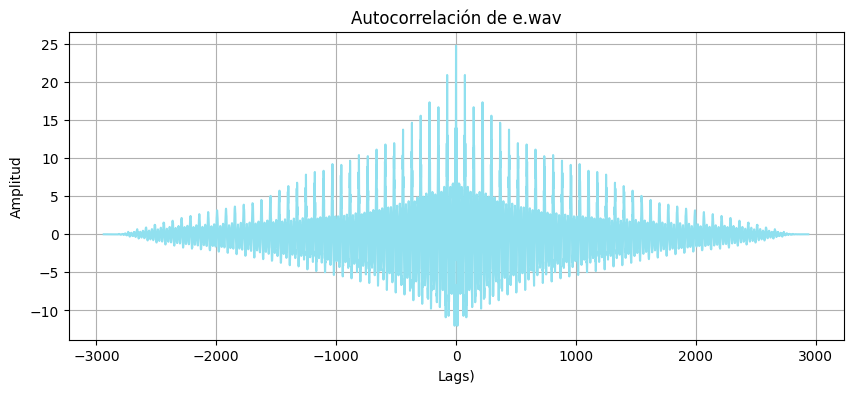

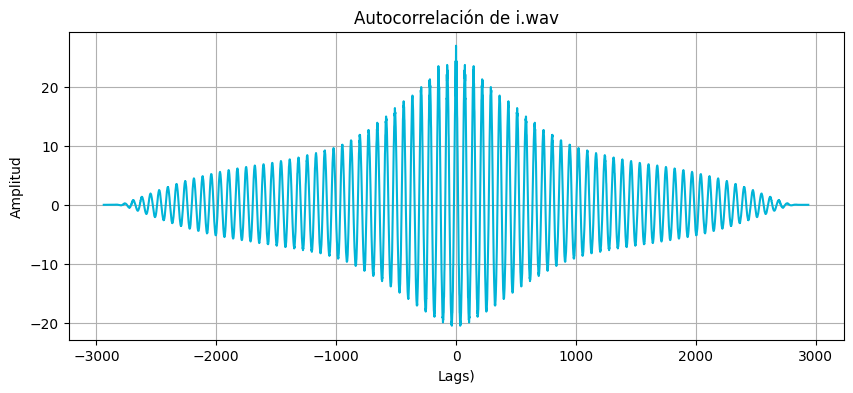

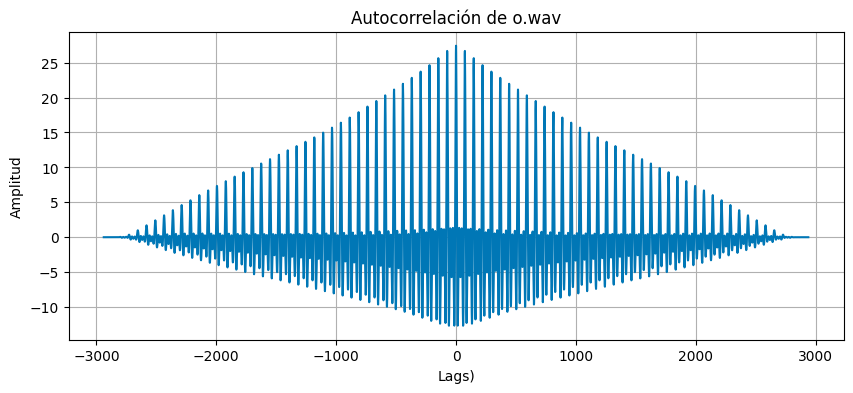

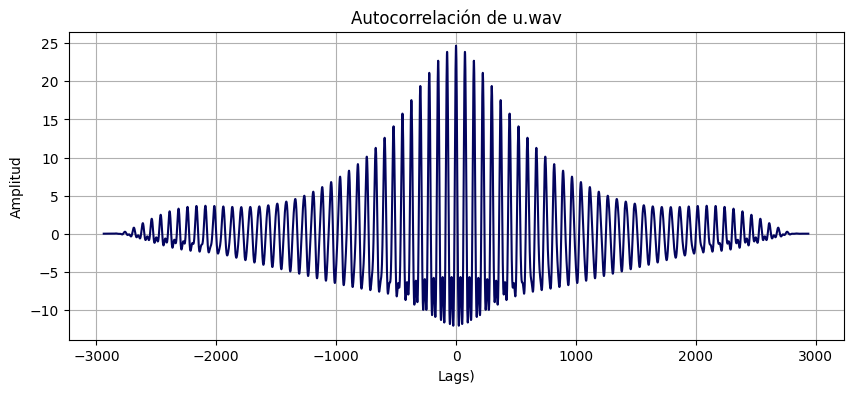

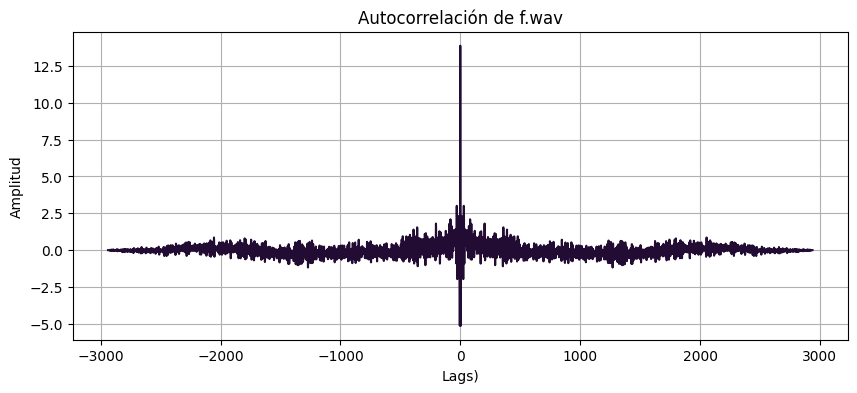

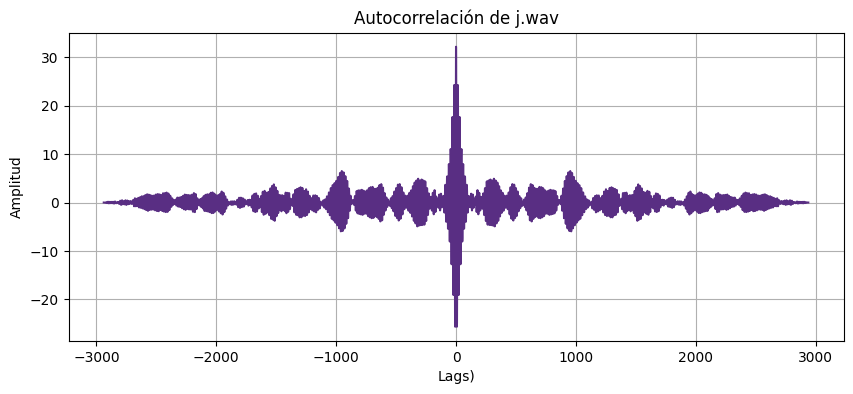

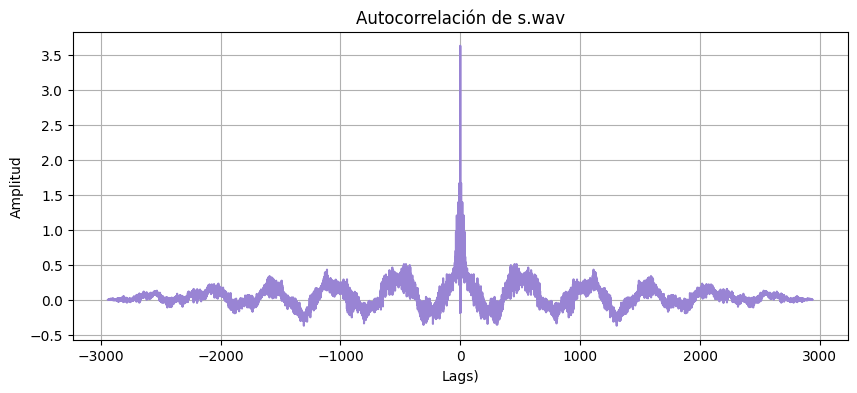

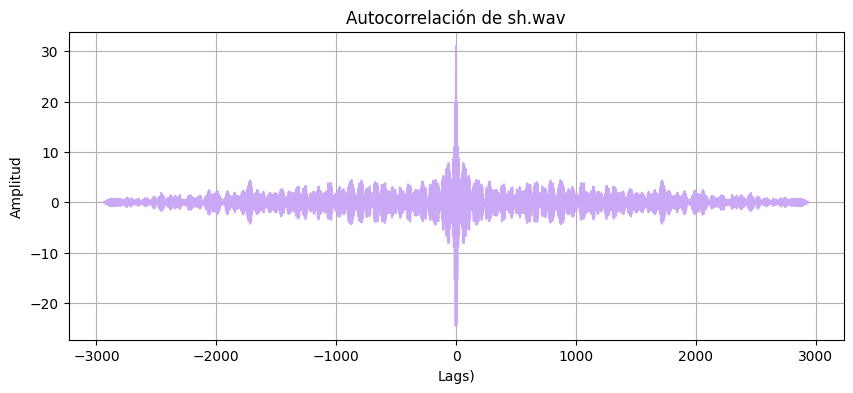

In [43]:
def graficar_autocorrelacion(autocorr, color, nombre, lags):

    plt.figure(figsize=(10, 4))
    plt.plot(lags, autocorr, color=color)
    plt.title(f"Autocorrelación de {nombre}")
    plt.xlabel('Lags)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

for i, vocal in enumerate(vocales):
    graficar_autocorrelacion(autocorrelaciones[i], colores1[i], vocal, lags_var[i])
for i, consonante in enumerate(consonantes):
    graficar_autocorrelacion(autocorrelaciones[i + len(vocales)], colores3[i], consonante, lags_var[i + len(vocales)])